In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median


import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("2019_partnerships_ipl.csv")
df.head()


,index,team,player_1,player_2,score_1,score_2
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39


In [ ]:
# prepare dataframe 
df_dc = df[df['team']=="Chennai Super Kings"]

df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['player_1'], df_dc['player_2'])]
df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

df_dc.head()

,index,team,player_1,player_2,score_1,score_2,partners,partnership
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0,"[AT Rayudu, SR Watson]",AT RayuduSR Watson
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19,"[AT Rayudu, SK Raina]",AT RayuduSK Raina
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9,"[AT Rayudu, KM Jadhav]",AT RayuduKM Jadhav
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4,"[KM Jadhav, RA Jadeja]",KM JadhavRA Jadeja
24,54,Chennai Super Kings,AT Rayudu,SR Watson,5,16,"[AT Rayudu, SR Watson]",AT RayuduSR Watson


In [ ]:

p1 = []
p2 = []


r1 = []
r2 = []

for p in df_dc['partnership'].unique():
    
    temp = df_dc[df_dc['partnership'] == p]
    p1.append(temp.iloc[0]['player_1'])
    p2.append(temp.iloc[0]['player_2'])
    
    a = []
    b = []
    
    # individual scores for both the players
    for index, row in temp.iterrows():
        #  player-2 scores
        a.append(row['score_1'])
        # player-2 scores
        b.append(row['score_2'])
    
    r1.append(median(a))
    r2.append(median(b))

In [ ]:

team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})
team_df.head()


,p1,p2,r1,r2
0,AT Rayudu,SR Watson,3.0,1.5
1,AT Rayudu,SK Raina,7.5,11.0
2,AT Rayudu,KM Jadhav,3.0,9.0
3,RA Jadeja,KM Jadhav,3.5,2.5
4,SR Watson,SK Raina,24.0,5.0


In [ ]:

team_df['lead'] = np.where(team_df['r1'] >= team_df['r2'], team_df['p1'], team_df['p2'])
team_df['follower'] = np.where(team_df['lead'] == team_df['p1'], team_df['p2'], team_df['p1'])
team_df['larger_score'] = np.where(team_df['r1'] >= team_df['r2'], team_df['r1'], team_df['r2'])
team_df['total_score'] = team_df['r1'] + team_df['r2']

# performance ratio
team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)

In [ ]:
# construct graph
G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# edge weights
_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

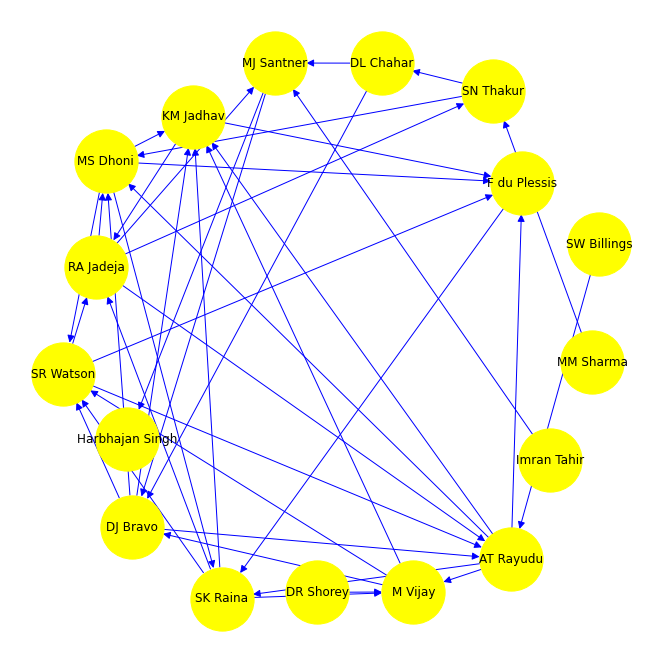

In [ ]:
# graph formation 
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21)
nx.draw(G, with_labels=True, node_color='yellow', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='b', arrowsize=15)
plt.show()

In [ ]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('AT Rayudu', 9),
 ('MS Dhoni', 8),
 ('SR Watson', 7),
 ('SK Raina', 7),
 ('KM Jadhav', 7),
 ('RA Jadeja', 7),
 ('DJ Bravo', 7),
 ('M Vijay', 6),
 ('F du Plessis', 5),
 ('MJ Santner', 5),
 ('SN Thakur', 4),
 ('DL Chahar', 3),
 ('MM Sharma', 1),
 ('SW Billings', 1),
 ('DR Shorey', 1),
 ('Harbhajan Singh', 1),
 ('Imran Tahir', 1)]

In [ ]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)

[('KM Jadhav', 5),
 ('SR Watson', 4),
 ('AT Rayudu', 4),
 ('MS Dhoni', 4),
 ('F du Plessis', 4),
 ('SK Raina', 3),
 ('RA Jadeja', 3),
 ('DJ Bravo', 3),
 ('MJ Santner', 3),
 ('M Vijay', 3),
 ('SN Thakur', 2),
 ('DL Chahar', 1),
 ('Harbhajan Singh', 1),
 ('MM Sharma', 0),
 ('SW Billings', 0),
 ('DR Shorey', 0),
 ('Imran Tahir', 0)]

In [ ]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)



[('AT Rayudu', 5),
 ('SK Raina', 4),
 ('RA Jadeja', 4),
 ('MS Dhoni', 4),
 ('DJ Bravo', 4),
 ('SR Watson', 3),
 ('M Vijay', 3),
 ('KM Jadhav', 2),
 ('DL Chahar', 2),
 ('SN Thakur', 2),
 ('MJ Santner', 2),
 ('MM Sharma', 1),
 ('F du Plessis', 1),
 ('SW Billings', 1),
 ('DR Shorey', 1),
 ('Imran Tahir', 1),
 ('Harbhajan Singh', 0)]